In [1]:
from SRGAN_funcs import load_model, load_and_combine_channels
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def mse(sr, hr):
    square = tf.square(sr[..., :2] - hr[..., :2])
    return tf.reduce_mean(square)

In [3]:
generator_SRGAN, _ = load_model("../Simple_Currents_SR/models/final", mse=True)
generator_temp, _ = load_model("../Currents_and_temperature/models/final", mse=True)
generator_ssh, _ = load_model("../Currents_and_SSH/models/final", mse=True)
generator_NS, _ = load_model("../Currents_with_NS/models/final", mse=True)

In [4]:
path_HR_val = "../../data/val/HR"
path_LR_val = "../../data/val/LR"

hr_val = load_and_combine_channels(path_HR_val)
lr_val = load_and_combine_channels(path_LR_val)

hr_temp_val = load_and_combine_channels(path_HR_val, "temp")
lr_temp_val = load_and_combine_channels(path_LR_val, "temp")

hr_NS_val = load_and_combine_channels(path_HR_val, "ssh")
lr_NS_val = load_and_combine_channels(path_LR_val, "ssh")

path_HR_test = "../../data/test/HR"
path_LR_test = "../../data/test/LR"

hr_test = load_and_combine_channels(path_HR_test)
lr_test = load_and_combine_channels(path_LR_test)

hr_temp_test = load_and_combine_channels(path_HR_test, "temp")
lr_temp_test = load_and_combine_channels(path_LR_test, "temp")

hr_NS_test = load_and_combine_channels(path_HR_test, "ssh")
lr_NS_test = load_and_combine_channels(path_LR_test, "ssh")

In [5]:
sr_val = generator_SRGAN(lr_val)
sr_temp_val = generator_temp(lr_temp_val)
sr_ssh_val = generator_ssh(lr_NS_val)
sr_NS_val = generator_NS(lr_NS_val)

sr_test = generator_SRGAN(lr_test)
sr_temp_test = generator_temp(lr_temp_test)
sr_ssh_test = generator_ssh(lr_NS_test)
sr_NS_test = generator_NS(lr_NS_test)

In [6]:
mse_srgan = np.array([mse(sr_, hr_val).numpy() for sr_ in sr_val] + [mse(sr_, hr_test).numpy() for sr_ in sr_test])
mse_temp = np.array([mse(sr_, hr_val).numpy() for sr_ in sr_temp_val] + [mse(sr_, hr_test).numpy() for sr_ in sr_temp_test])
mse_ssh = np.array([mse(sr_, hr_val).numpy() for sr_ in sr_ssh_val] + [mse(sr_, hr_test).numpy() for sr_ in sr_ssh_test])
mse_ns = np.array([mse(sr_, hr_val).numpy() for sr_ in sr_NS_val] + [mse(sr_, hr_test).numpy() for sr_ in sr_NS_test])

In [7]:
mses = pd.DataFrame({"SRGAN": mse_srgan, "SRGAN + temperature": mse_temp, "SRGAN + SSH": mse_ssh, "NS-SRGAN": mse_ns})

<Axes: >

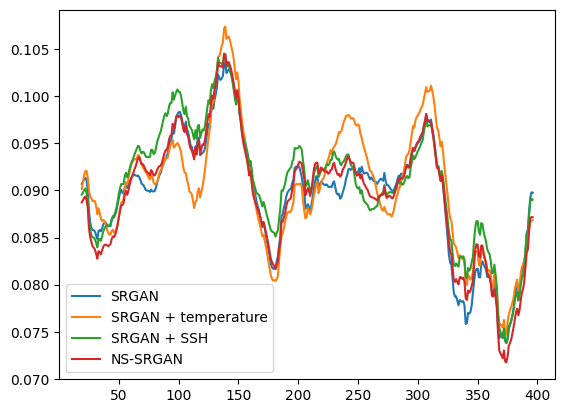

In [8]:
mses.rolling(window=20).mean().plot()